In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv')

In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


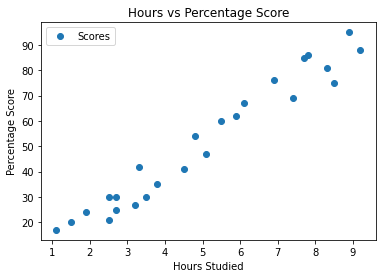

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
X[1:5]

array([[5.1],
       [3.2],
       [8.5],
       [3.5]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # training the model

LinearRegression()

In [ ]:
print(regressor.intercept_)

2.5200767068662344


In [ ]:
print(regressor.coef_)

[9.85475541]


In [ ]:
y_pred = regressor.predict(X_test) # prediction 

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
Mean Squared Error: 32.865569647342106
Root Mean Squared Error: 5.732850045774972
R squared: 0.9298077534821835


In [ ]:
# Regression Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
y_pred_tree = dec_tree_reg.predict(X_test)

In [ ]:
print('Decision Tree Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print('R squared:', metrics.r2_score(y_test, y_pred_tree))

Decision Tree Error: 10.917875251164945
Mean Absolute Error: 9.6
Mean Squared Error: 119.2
R squared: 0.6991722188572582


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor(random_state=0)
rand_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_rand_forest = rand_forest_reg.predict(X_test)

In [ ]:
print('Random Forest Regressor Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand_forest)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand_forest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand_forest))
print('R squared:', metrics.r2_score(y_test, y_pred_rand_forest))

Random Forest Regressor Error: 8.829165125058857
Mean Absolute Error: 6.862833333333333
Mean Squared Error: 77.95415680555557
R squared: 0.8032653018232496


In [ ]:
print(X_train[0])
print(regressor.predict(X_train[[0]]))

[3.8]
[39.67865467]


In [ ]:
import pickle

In [ ]:
data = {"model":regressor, "hours":X_train}
with open('saved_steps.pkl', 'wb') as file:    #write to pickle file
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:    #read the pickle file
    data = pickle.load(file)

regressor_loaded = data["model"]
hours = data["hours"]

In [ ]:
y_pred = regressor_loaded.predict(X_train[[0]])
print(f"Number of Hours: {X_train[0]} , Marks: {y_pred}")

Number of Hours: [3.8] , Marks: [39.67865467]


In [ ]:
y_pred = regressor_loaded.predict(X_test[[0]])
print(f"Number of Hours: {X_test[0]} , Marks: {y_pred}")

Number of Hours: [1.5] , Marks: [16.88414476]


In [ ]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

# Multiple Linear Regression

In [ ]:
dataset2 = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset2.shape

(48, 5)

In [ ]:
dataset2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
dataset2.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [ ]:
X = dataset2[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset2['Petrol_Consumption']

In [ ]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


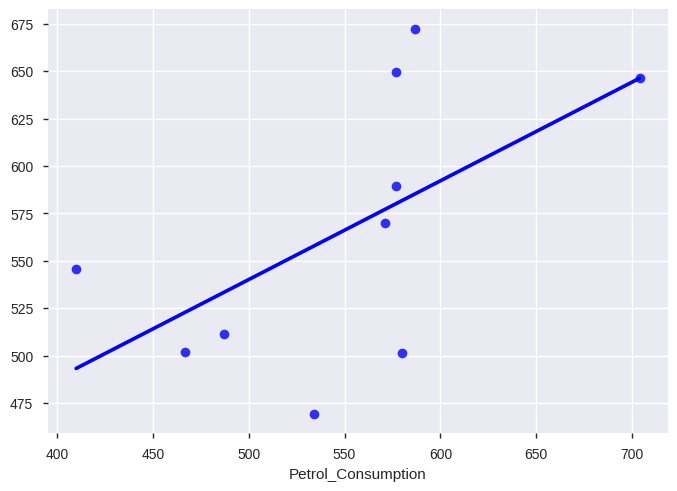

In [ ]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

In [ ]:
sns.pairplot(dataset2, hue="Petrol_Consumption")

In [ ]:
sns.pairplot(dataset, hue="Scores")